<a href="https://colab.research.google.com/github/panghanwu/build_neural_network_python/blob/main/MLP_OOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

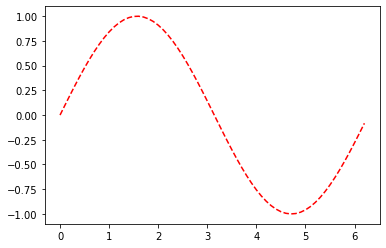

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""Data"""
input_data  = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data) 

plt.plot(input_data, correct_data, 'r--')

In [2]:
"""Parameter"""
input_data = (input_data-np.pi)/np.pi  # normalized
n_data = len(input_data)  # number of data
n_in = 1  # input layer
n_mid = 3  # middle layer
n_out = 1  # output layer
wb_shrinker = 0.01  # shrink weights
eta = 0.1  # learning rate
epoch = 2001  # training period
interval = 500  # period of plotting training state

In [3]:
"""Function"""
class MiddleLayer:
  def __init__(self, n_upper, n):
    self.w1 = wb_shrinker * np.random.randn(n_upper, n)
    self.b1 = wb_shrinker * np.random.randn(n)

  def forward(self, x):
    self.x = x
    u1 = np.dot(x, self.w1) + self.b1
    self.y1 = 1/(1+np.exp(-u1))  # sigmoid
  
  def backward(self, grad_y1):
    delta1 = grad_y1 * (1-self.y1) * self.y1
    self.grad_w1 = np.dot(self.x.T, delta1)
    self.grad_b1 = np.sum(delta1, axis=0)
  
  def update(self, eta):
    self.w1 -= eta * self.grad_w1
    self.b1 -= eta * self.grad_b1


class OutputLayer:
  def __init__(self, n_upper, n):
    self.w2 = wb_shrinker * np.random.randn(n_upper, n)
    self.b2 = wb_shrinker * np.random.randn(n)
  
  def forward(self, y1):
    self.y1 = y1
    u2 = np.dot(y1, self.w2) + self.b2
    self.y2 = u2
  
  def backward(self, t):
    delta2 = self.y2 - t
    self.grad_w2 = np.dot(self.y1.T, delta2)
    self.grad_b2 = np.sum(delta2, axis=0)
    self.grad_y1 = np.dot(delta2, self.w2.T)
  
  def update(self, eta):
    self.w2 -= eta * self.grad_w2
    self.b2 -= eta * self.grad_b2

# create layers and initialize
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)


Epoch:0/2001 Error0.26109250544456125
Epoch:500/2001 Error0.005832797795512335
Epoch:1000/2001 Error0.0034633130554360715
Epoch:1500/2001 Error0.0010241359561440398
Epoch:2000/2001 Error0.00011213972079377298


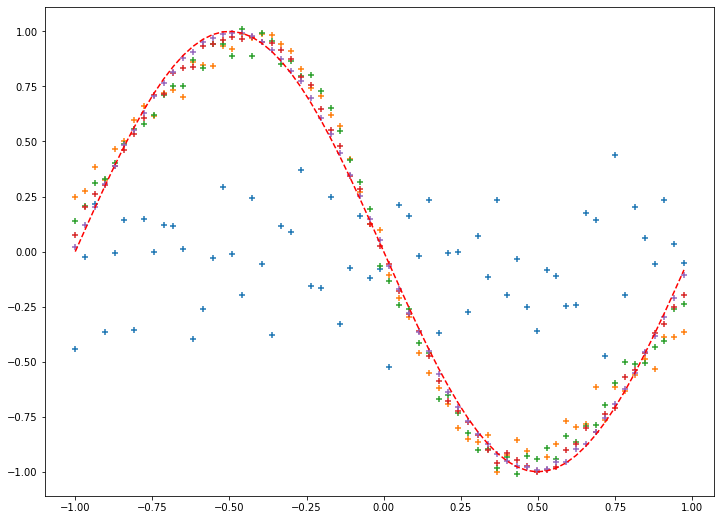

In [4]:
"""Training!"""
plt.figure(figsize=(12,9))
plt.plot(input_data, correct_data, 'r--')

for i in range(epoch):
  #
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)
  
  #
  total_error = 0
  plot_x = []
  plot_y2 = []

  for idx in index_random:
    x = input_data[idx]
    t = correct_data[idx]
 
    middle_layer.forward(x.reshape(1,1))
    output_layer.forward(middle_layer.y1)
 
    output_layer.backward(t.reshape(1,1))
    middle_layer.backward(output_layer.grad_y1)
 
    middle_layer.update(eta)
    output_layer.update(eta)

 
    if i%interval == 0:
      y2 = output_layer.y2.reshape(-1)
      total_error += 1.0/2.0*np.sum(np.square(y2-t))

      plot_x.append(x)
      plot_y2.append(y2)
  
  if i%interval == 0:

    plt.scatter(plot_x, plot_y2, marker='+')
    
    print('Epoch:' + str(i) + '/' + str(epoch), 'Error' + str(total_error/n_data))


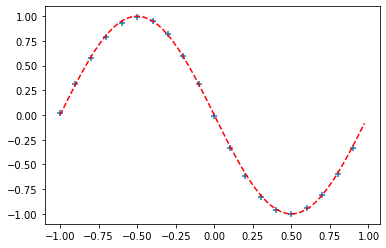

In [17]:
"""Testing"""
test = np.arange(-1,1,0.1)

middle_layer.forward(test.reshape(-1,1))
output_layer.forward(middle_layer.y1)
output_layer.y2

plt.plot(input_data, correct_data, 'r--')
plt.scatter(test, output_layer.y2.reshape(-1), marker='+')